In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
bitcoin = pd.read_csv('BTC-EUR.csv',index_col='Date',parse_dates=True)

In [13]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


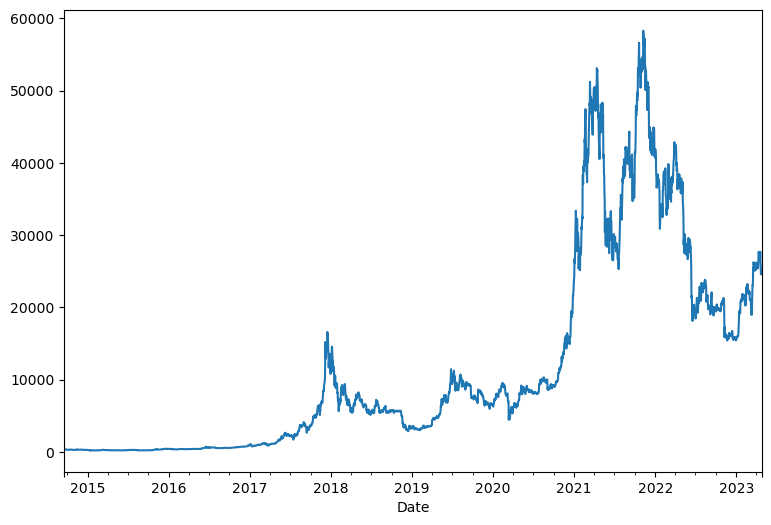

In [14]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

In [15]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-04-16', '2023-04-17', '2023-04-18', '2023-04-19',
               '2023-04-20', '2023-04-21', '2023-04-22', '2023-04-23',
               '2023-04-24', '2023-04-25'],
              dtype='datetime64[ns]', name='Date', length=3143, freq=None)

C:\Users\mtx\AppData\Local\Temp\ipykernel_66436\2646388565.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2020']['Close'].plot()


<AxesSubplot: xlabel='Date'>

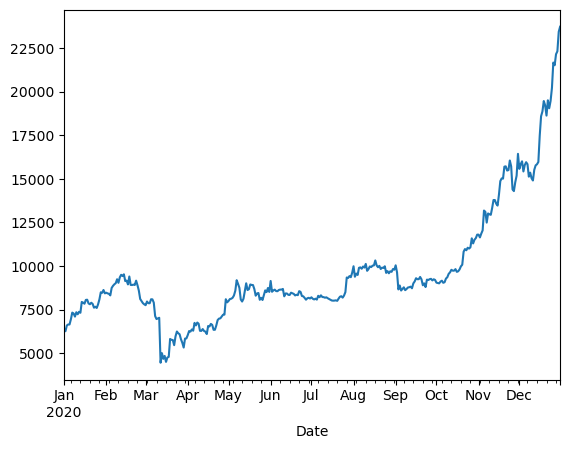

In [19]:
bitcoin['2020']['Close'].plot()

<AxesSubplot: xlabel='Date'>

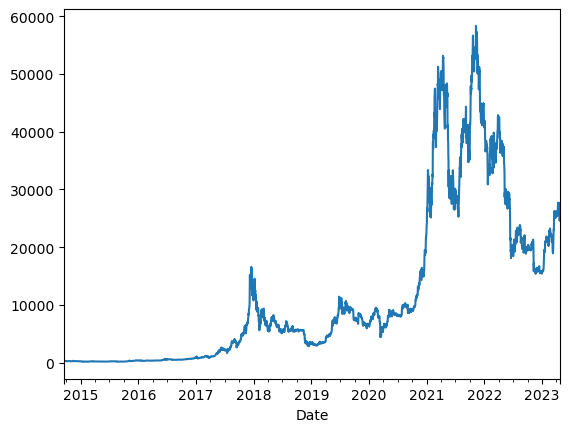

In [21]:
bitcoin['2014':'2023']['Close'].plot()

<AxesSubplot: xlabel='Date'>

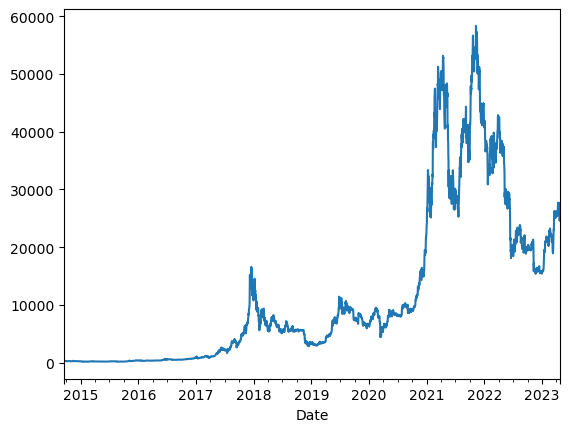

In [22]:
bitcoin.loc['2014':'2023']['Close'].plot()

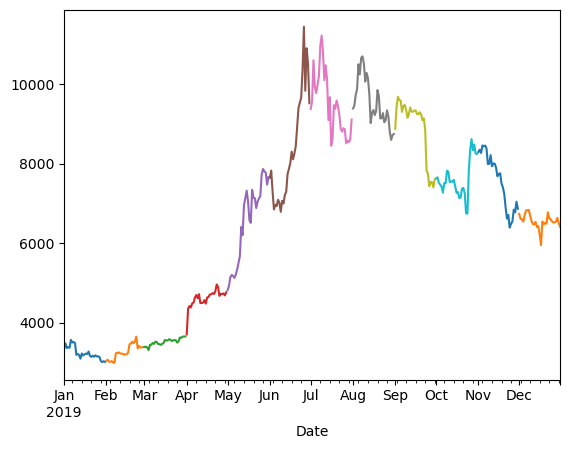

In [31]:
bitcoin.loc['2019','Close'].resample('M').plot()
plt.show()

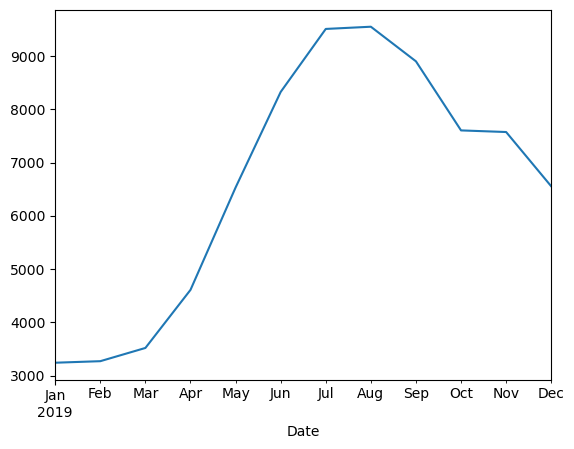

In [30]:
bitcoin.loc['2019','Close'].resample('M').mean().plot()
plt.show()

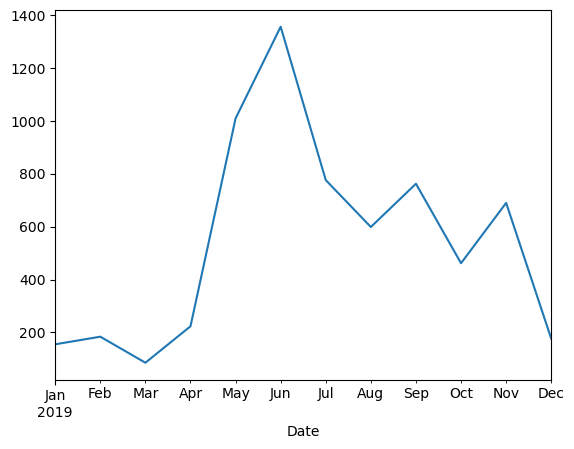

In [34]:
bitcoin.loc['2019','Close'].resample('M').std().plot()
plt.show()

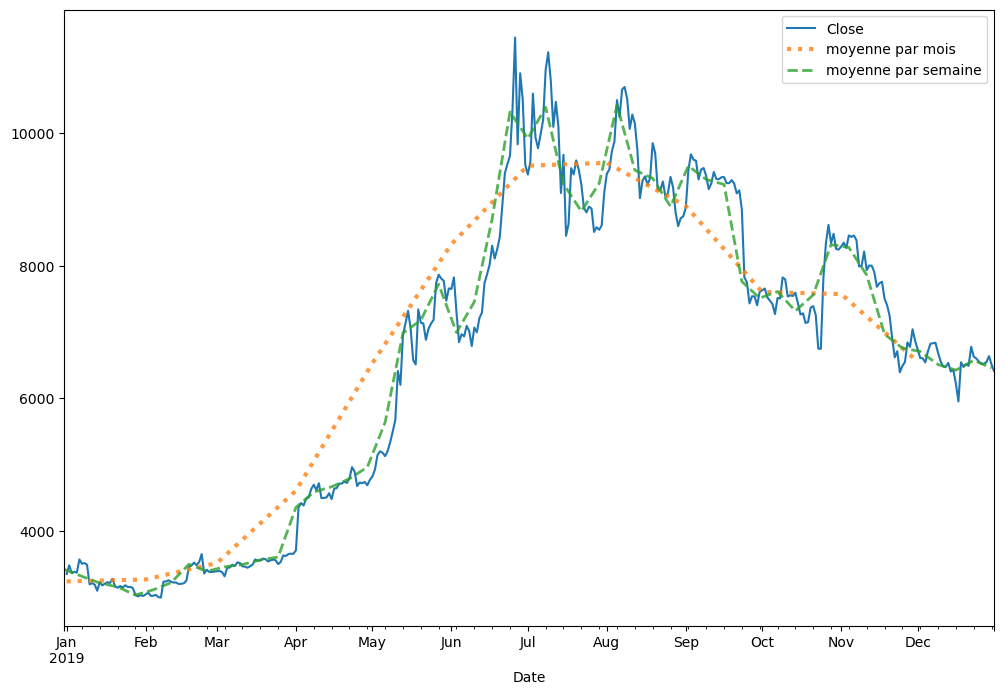

In [39]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019','Close'].plot()
bitcoin.loc['2019','Close'].resample('M').mean().plot(label='moyenne par mois',lw=3,ls=':',alpha=0.8)
bitcoin.loc['2019','Close'].resample('W').mean().plot(label='moyenne par semaine',lw=2,ls='--',alpha=0.8)
plt.legend()
plt.show()

In [49]:
# tableau avec moyenne ecart moyen min max par semaine
m = bitcoin.loc['2019','Close'].resample('W').agg(['mean','std','min','max'])

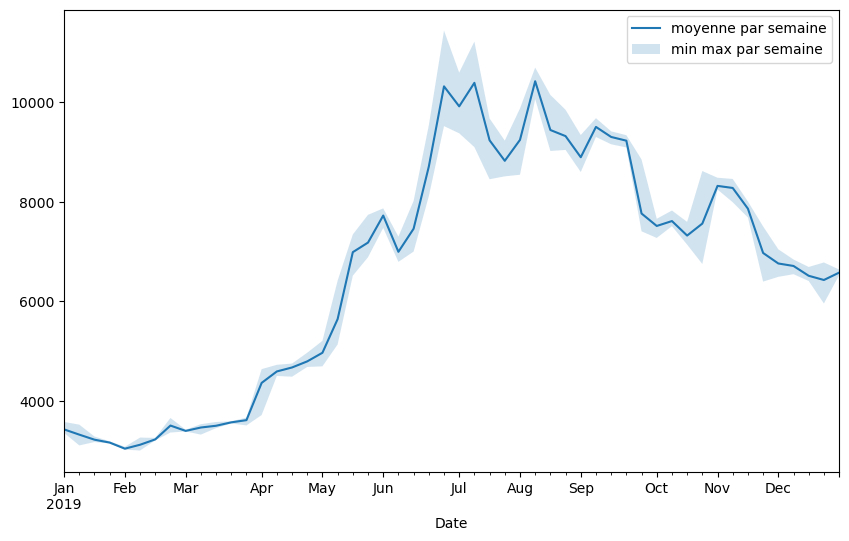

In [50]:
plt.figure(figsize=(10,6))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index,m['max'],m['min'],alpha=0.2,label='min max par semaine')
plt.legend()
plt.show()

<AxesSubplot: xlabel='Date'>

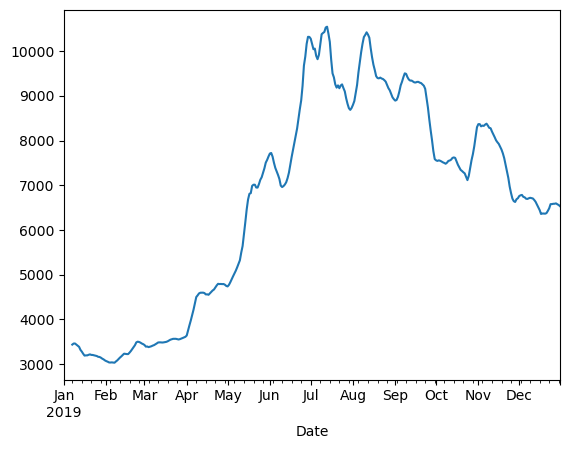

In [54]:
bitcoin.loc['2019','Close'].rolling(window=7).mean().plot()

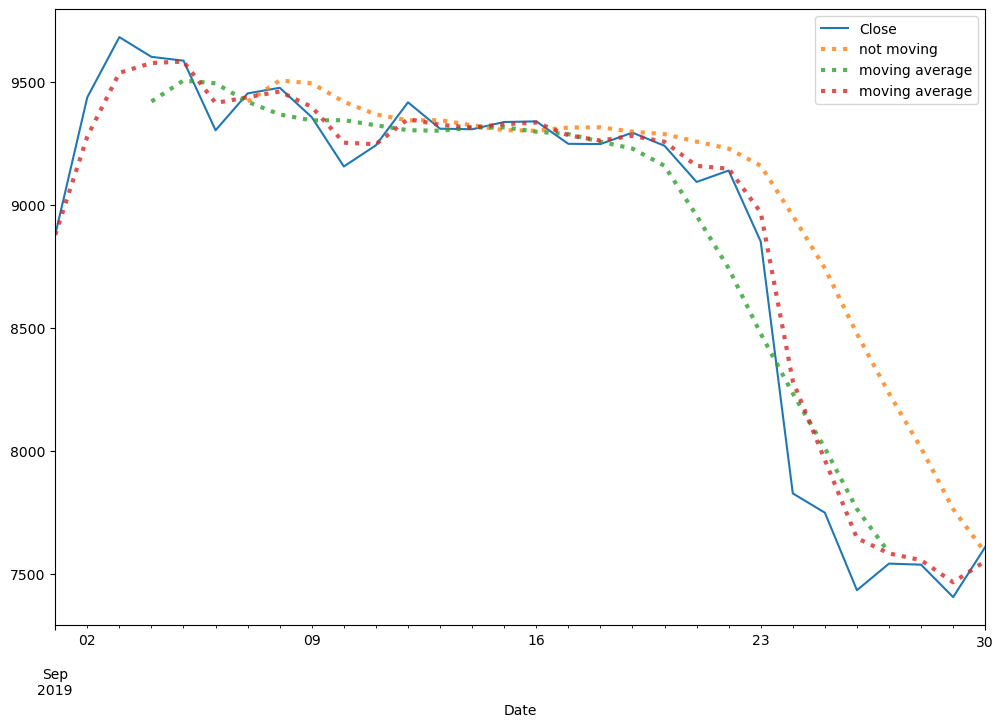

In [64]:
# ewm moyenne mobile exponentielle
# change en fonction du temps avec le facteur de lissage
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
bitcoin.loc['2019-09','Close'].rolling(window=7).mean().plot(label='not moving',lw=3,ls=':',alpha=0.8)
bitcoin.loc['2019-09','Close'].rolling(window=7,center=True).mean().plot(label='moving average',lw=3,ls=':',alpha=0.8)
bitcoin.loc['2019-09','Close'].ewm(alpha=0.6).mean().plot(label='moving average',lw=3,ls=':',alpha=0.8)
plt.legend()
plt.show()

In [65]:
ethereum = pd.read_csv('ETH-EUR.csv',index_col='Date',parse_dates=True)

C:\Users\mtx\AppData\Local\Temp\ipykernel_66436\3896088478.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ethereum['2019']['Close'].plot()


<AxesSubplot: xlabel='Date'>

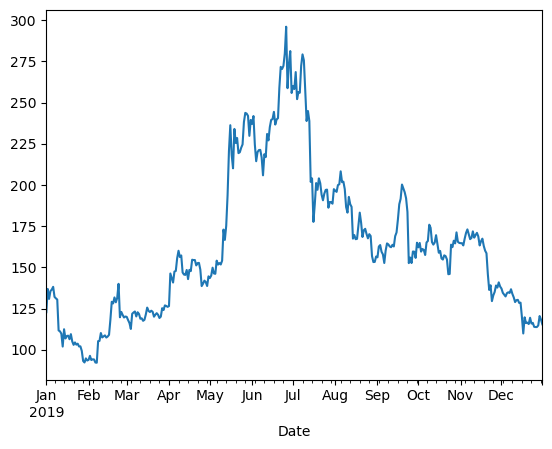

In [67]:
ethereum['2019']['Close'].plot()

In [72]:
btc_eth = pd.merge(bitcoin,ethereum,on='Date',how='inner',suffixes=('_btc','_eth'))

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

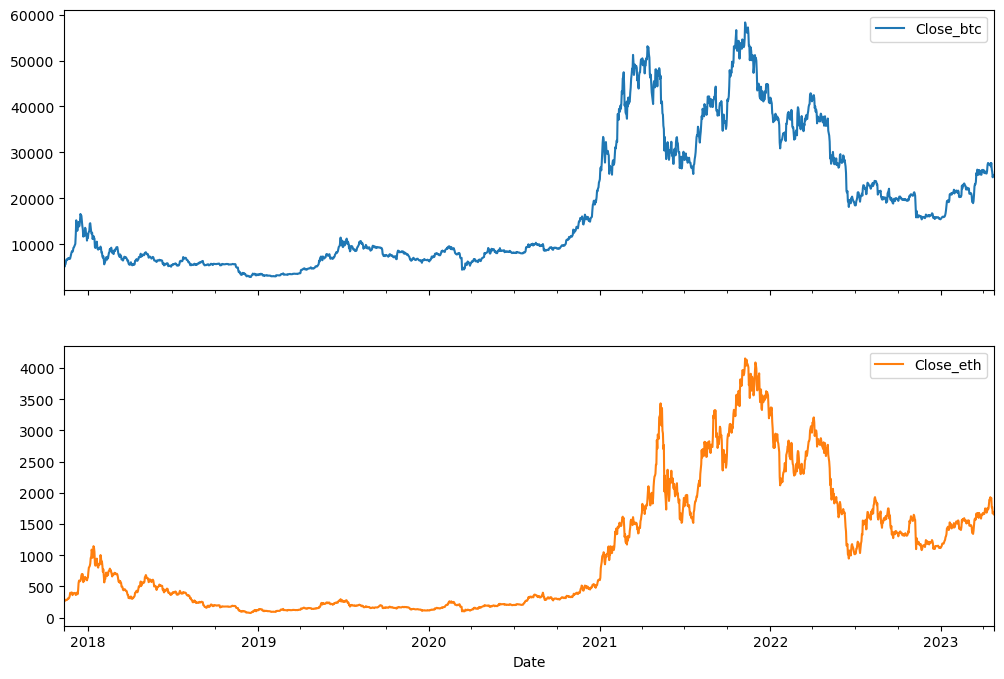

In [76]:
btc_eth[['Close_btc','Close_eth']].plot(subplots=True, figsize=(12,8))

In [79]:
# corrélation
btc_eth[['Close_btc','Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.927653
Close_eth,0.927653,1.000000


In [80]:
correlations = btc_eth[['Close_btc','Close_eth']].corr()